Image shape  (960L, 1280L, 3L)


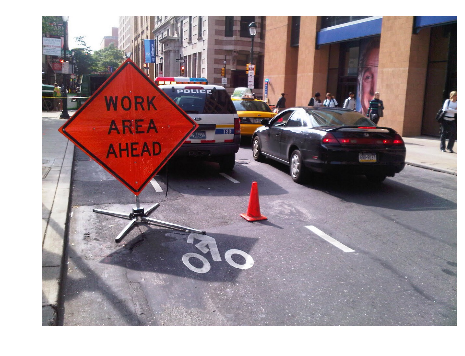

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# load a image
img = cv2.imread('../images/1.jpg', -1)

print 'Image shape ', img.shape

# cv2.imshow('Image ',img)

#show what going on
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


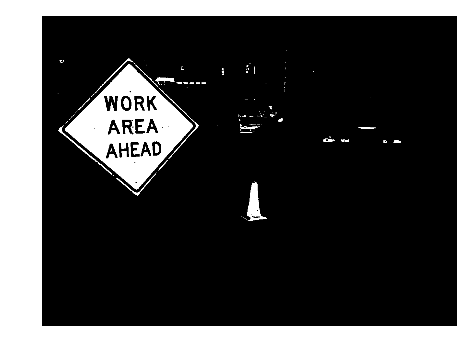

In [2]:
# convert to HSV color space, this will produce better color filtering
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#threshold on low range of HSV red
low_redl = np.array([0, 135, 135])
low_redh = np.array([15, 255, 255])
imgThreshLow = cv2.inRange(imgHSV, low_redl, low_redh)

#threshold on high range of HSV red
high_redl = np.array([159, 135, 135])
high_redh = np.array([179, 255, 255])
imgThreshHigh = cv2.inRange(imgHSV, high_redl, high_redh)

#combine low range red thresh and high range red thresh
imgThresh = cv2.bitwise_or(imgThreshLow, imgThreshHigh)


#show what going on
plt.axis("off")
plt.imshow(imgThresh, cmap='Greys_r')
plt.show()



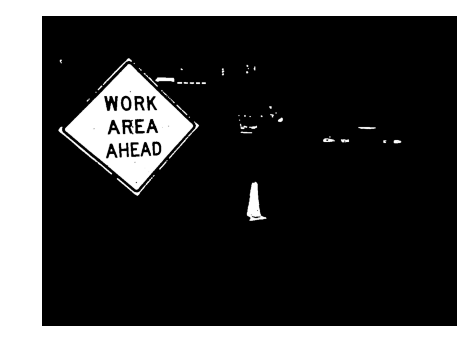

In [3]:
imgThreshSmoothed = imgThresh.copy()

#open image (erode, then dilate)
kernel = np.ones((3, 3), np.uint8)
imgThreshSmoothed = cv2.erode(imgThresh, kernel, iterations=1)
imgThreshSmoothed = cv2.dilate(imgThreshSmoothed, kernel, iterations=1)
#Gaussian blur
imgThreshSmoothed = cv2.GaussianBlur(imgThreshSmoothed, (5, 5), 0)

plt.axis("off")

plt.imshow(imgThreshSmoothed, cmap='Greys_r')
plt.show()


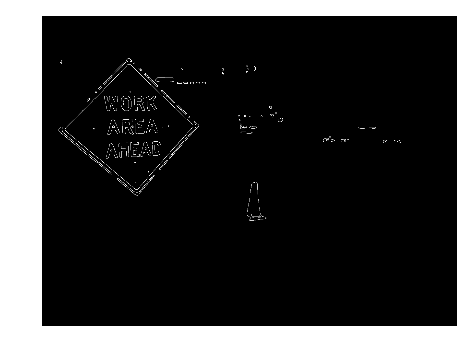

In [4]:
imgCanny = cv2.Canny(imgThreshSmoothed,160,80)

plt.axis("off")

plt.imshow(imgCanny, cmap='Greys_r')
plt.show()

len(contours) 61


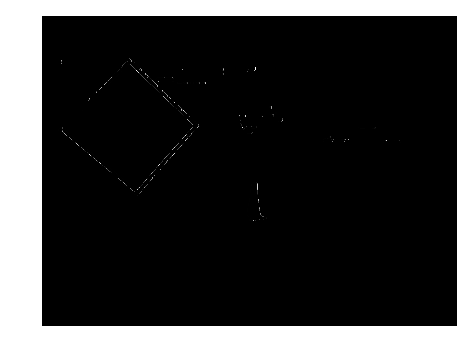

In [5]:
image, contours, hierarchy = cv2.findContours(imgCanny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print 'len(contours)',len(contours)
plt.axis("off")

plt.imshow(imgCanny, cmap='Greys_r')
plt.show()

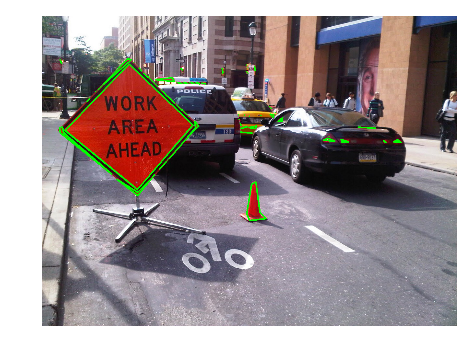

In [6]:
listOfContours = []
if len(contours) != 0:
    for cnt in contours:
        epsilon = 6.7 # something to play with to fine tune
        # print'epsilon',epsilon
        listOfContours.append(cv2.approxPolyDP(cnt, epsilon, True))

imghull2 = cv2.drawContours(img.copy(), listOfContours, -1, (0,255,0), 3)

#show what going on
plt.axis("off")
plt.imshow(cv2.cvtColor(imghull2, cv2.COLOR_BGR2RGB))
plt.show()


ok here a function to see if Cone [listOfContours] is pointing up.


In [7]:
def convexHullIsPointingUp(hull):
    x, y, w, h = cv2.boundingRect(hull)

    aspectRatio = float(w) / h
    if aspectRatio > 0.8:
        return False

    listOfPointsAboveCenter = []
    listOfPointsBelowCenter = []

    intYcenter = y + h / 2

    # step through all points in convex hull
    for point in hull:
        # and add each point to
        # list of points above or below vertical center as applicable
        if point[0][1] < intYcenter:
            listOfPointsAboveCenter.append(point)

        if point[0][1] >= intYcenter:
            listOfPointsBelowCenter.append(point)

    intLeftMostPointBelowCenter = listOfPointsBelowCenter[0][0][0]
    intRightMostPointBelowCenter = listOfPointsBelowCenter[0][0][0]

    # determine left most point below center
    for point in listOfPointsBelowCenter:

            if point[0][0] < intLeftMostPointBelowCenter:
                intLeftMostPointBelowCenter = point[0][0]

        # determine right most point below center
    for point in listOfPointsBelowCenter:
        if point[0][0] >= intRightMostPointBelowCenter:
            intRightMostPointBelowCenter = point[0][0]

        # step through all points above center
    for point in listOfPointsAboveCenter:
        if point[0][0] < intLeftMostPointBelowCenter or \
         point[0][0] > intRightMostPointBelowCenter:
            return False

    # if we get here, shape has passed pointing up check
    return True


In [8]:
print 'convexHull =', len(listOfContours)
listOfCones = []
for contour in listOfContours:
        hull = cv2.convexHull(contour)
        # print 'convexHull',len(temp)
        if (len(hull) >= 3 and len(hull) <= 10):
            print'Lets check to see if this one pointing up'
        else:
            continue

        if convexHullIsPointingUp(hull):
            print 'Yes it is Point up'
            listOfCones.append(hull)
            
print 'Number of Cones', len(listOfCones)

convexHull = 61
Lets check to see if this one pointing up
Yes it is Point up
Lets check to see if this one pointing up
Lets check to see if this one pointing up
Lets check to see if this one pointing up
Lets check to see if this one pointing up
Lets check to see if this one pointing up
Lets check to see if this one pointing up
Lets check to see if this one pointing up
Lets check to see if this one pointing up
Lets check to see if this one pointing up
Lets check to see if this one pointing up
Lets check to see if this one pointing up
Lets check to see if this one pointing up
Number of Cones 1


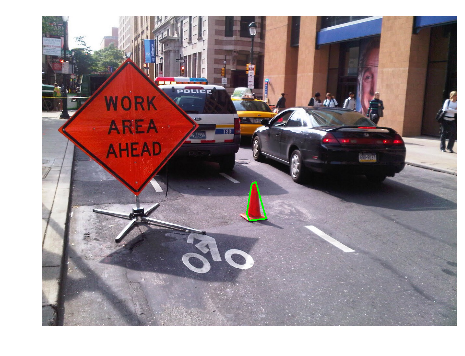

In [9]:
imghull = cv2.drawContours(img, listOfCones, -1, (0, 255, 0), 3)
#show what going on
plt.axis("off")
plt.imshow(cv2.cvtColor(imghull, cv2.COLOR_BGR2RGB))
plt.show()